# Probability & Statistics

In [2]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

## A Simple Example : Tossing Coins

In [8]:
# to simulate tosses of a fair coin
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [57, 43]


In [9]:
# can simulate multiple draws from any variable with a finite number of possible outcomes
# Multinomial function returns a vector with length equal to the number of possible outcomes
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample() # frequency of each outcome

tensor([47., 53.])

In [10]:
# the probabilities that they're inteded to estimate, sum to 1
Multinomial(100, fair_probs).sample() / 100

tensor([0.4500, 0.5500])

In [12]:
# as the number of repetitions grows, our estimates are guaranteed to converge
counts = Multinomial(10000, fair_probs).sample()
counts / 10000 

tensor([0.4967, 0.5033])

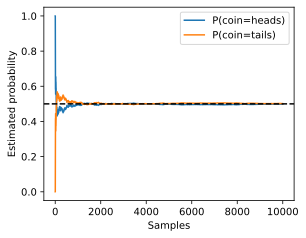

In [13]:
# as the sanoke size n grows, errors should go down at a rate of (1/sqrt(n))
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0) # cumulative sum
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

# visualize
d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()